In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("bank-marketing.csv")

In [3]:
df.shape

(45211, 19)

In [4]:
df.head(2)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [7]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


###### Describe the pdays column, make note of the mean, median and minimum values. Anything  fishy in the values 

In [8]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [9]:
## We can see that 75% values of pdays are -1.
## but the mean and standard deviation is not -1

##### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values? 

In [10]:
#pdays uses -1 as indicator and "no value". Hence treat these value as missing
#Where pdays is -1, replace with NaN.

In [11]:
df1=df.copy()

In [12]:
df1.drop(df1[df1["pdays"] < 0].index, inplace = True)

In [13]:
df1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [14]:
# Now the mean and median values changed because we have removed the rows where values was -1.
# i.e we have removed the customers who were not contacted for the campaign.

##### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

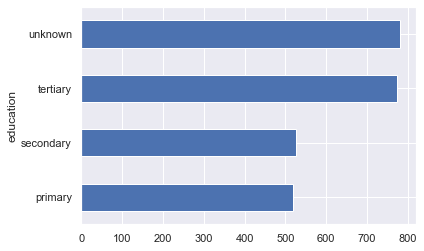

In [15]:
df1.groupby(["education"])["balance"].median().plot.barh()
plt.show()

In [16]:
# so we can say that people with tertiary level of education has highest median value for balance. 

##### Make a box plot for pdays. Do you see any outliers?
 

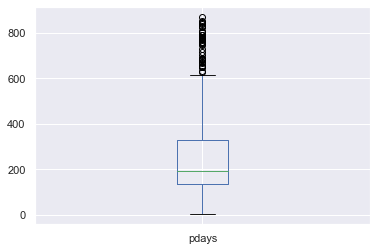

In [17]:
df1.pdays.plot.box()
plt.show()

In [18]:
# yes we can clearly see that there are huge number of outliers present in pdays column.

Boxplot with no Outliers


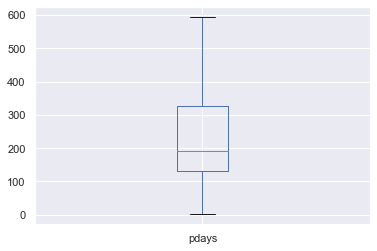

In [19]:
# Handling the Outliers
df2 = df1[df1['pdays'] >= 600]
df1 = df1.drop(df2.index,axis=0)
print('Boxplot with no Outliers')
df1.pdays.plot.box()
plt.show()

##### The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”. 


##### First, perform bi-variate analysis to identify the features that are directly associated with the target variable. 

#### Convert the response variable to a convenient form
 

In [20]:
df1.response.value_counts(normalize = True)

no     0.77014
yes    0.22986
Name: response, dtype: float64

In [21]:
df1.replace({'response':{'yes':1 , 'no':0}},inplace = True)

In [22]:
df1.response.value_counts()

0    6319
1    1886
Name: response, dtype: int64

#### Make suitable plots for associations with numerical features and categorical features’ 

In [37]:
cols = df1.columns.to_list()
num_cols= df1._get_numeric_data().columns.to_list()
cat_cols = list(set(cols) - set(num_cols))

print('Numerical Columns')
print(num_cols)
print('\nCategorical Columns')
print(cat_cols)

Numerical Columns
['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']

Categorical Columns
['housing', 'targeted', 'loan', 'month', 'contact', 'job', 'marital', 'poutcome', 'education', 'default']


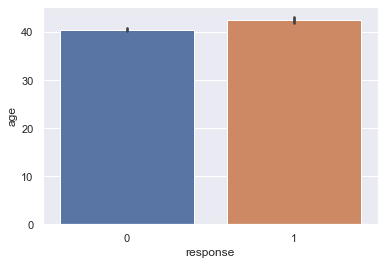

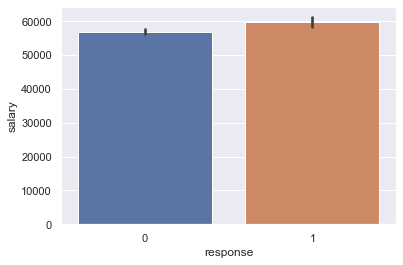

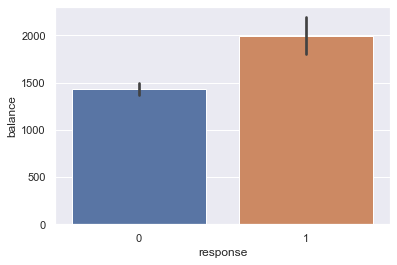

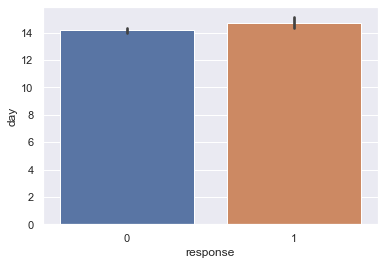

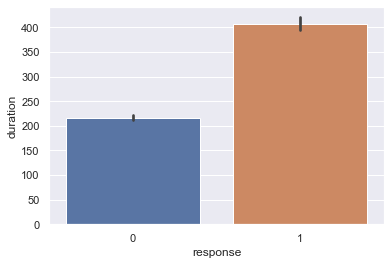

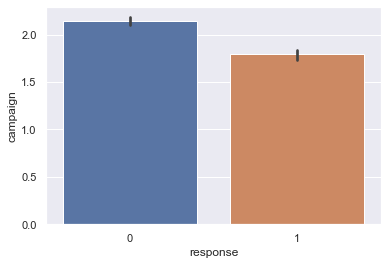

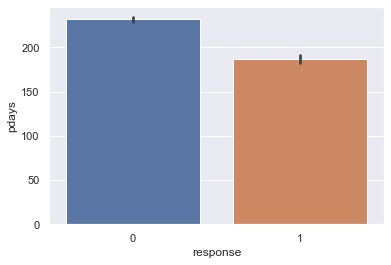

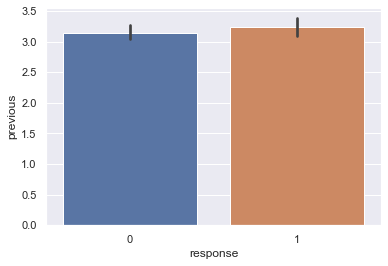

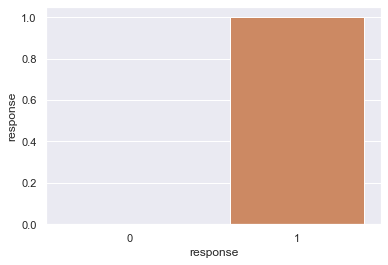

In [38]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

for i in df1[num_cols]:
    sns.barplot(df1['response'],df1[i])
    plt.show()

In [26]:
#Visualising Categorical Feature with Response

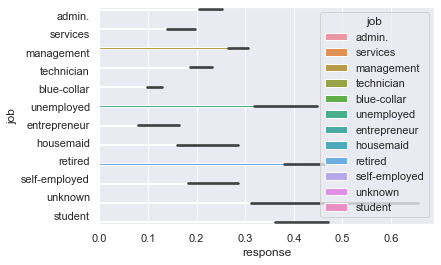

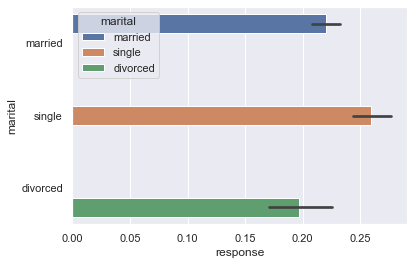

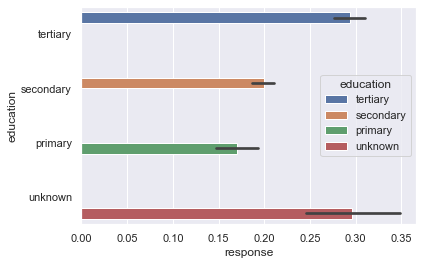

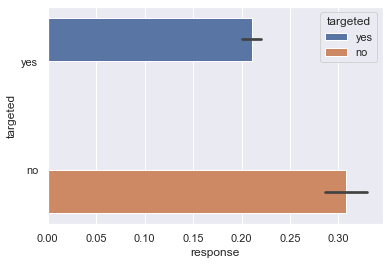

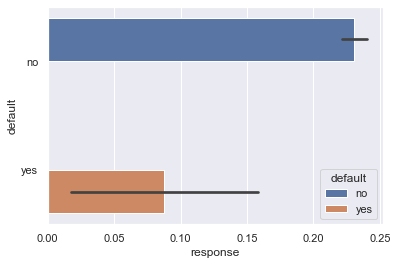

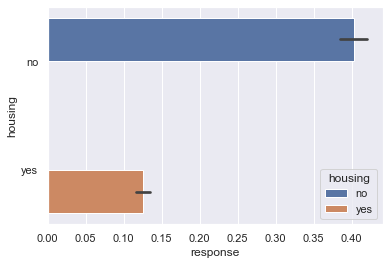

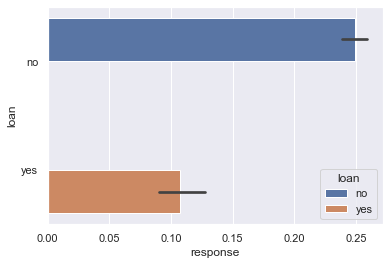

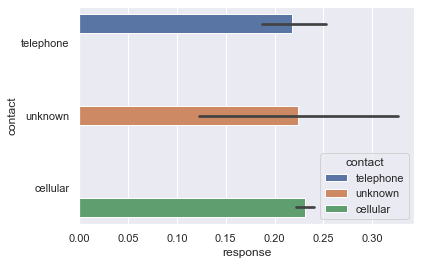

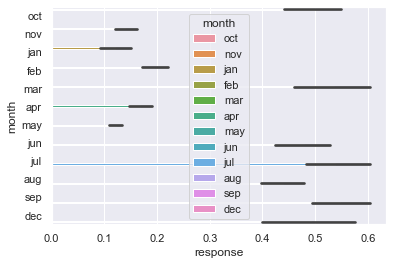

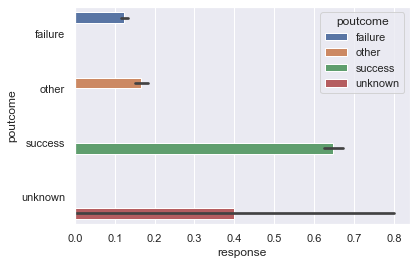

In [27]:
for i in df1[obj_col]:
    sns.barplot(df1['response'],df1[i],hue=df1[i])
    plt.show()

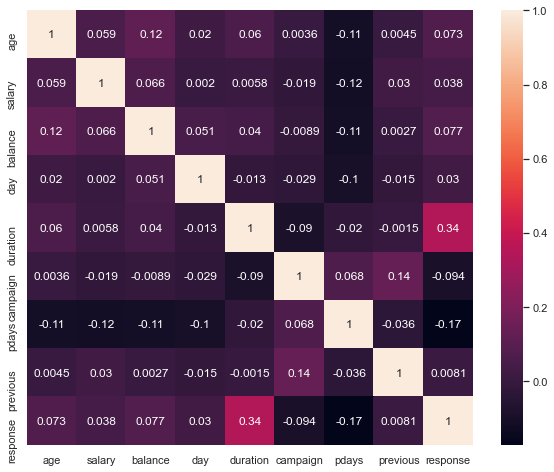

In [28]:
#Correlation
plt.figure(figsize=(10,8))
corr=df1.corr()
sns.heatmap(corr,annot =True)
plt.show()

In [29]:
#Yes previous campaign data is useful 
#we can see that duration variable is highly correlated with response. 
#Whereas pdays variable is not highly correlated with response variable.

<Figure size 720x576 with 0 Axes>

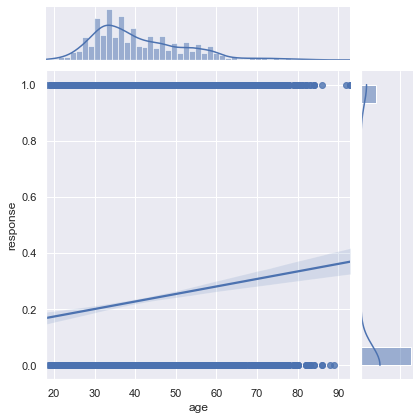

<Figure size 720x576 with 0 Axes>

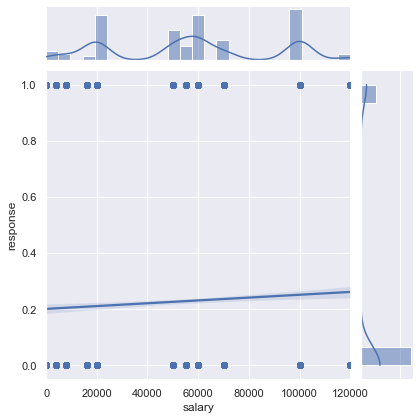

<Figure size 720x576 with 0 Axes>

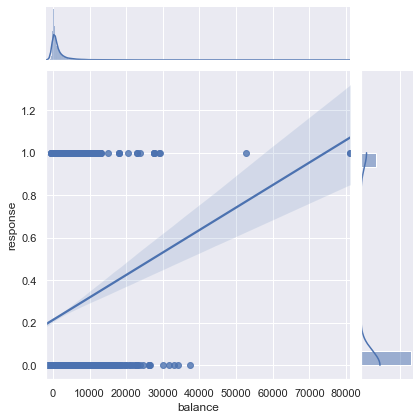

<Figure size 720x576 with 0 Axes>

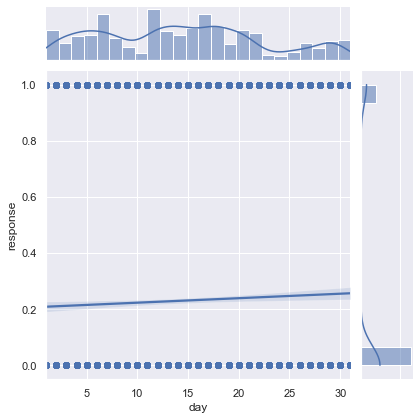

<Figure size 720x576 with 0 Axes>

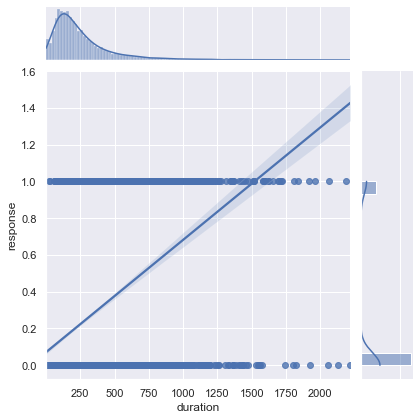

<Figure size 720x576 with 0 Axes>

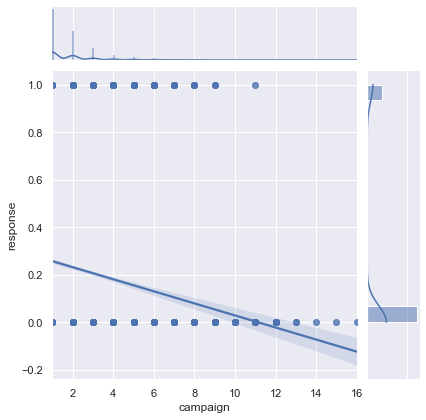

<Figure size 720x576 with 0 Axes>

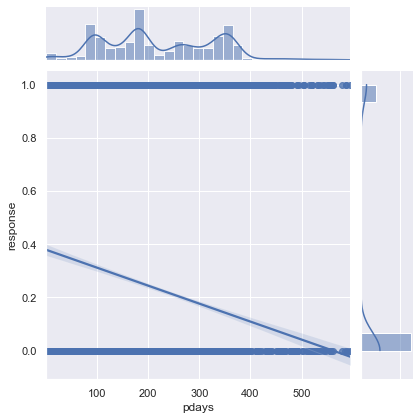

<Figure size 720x576 with 0 Axes>

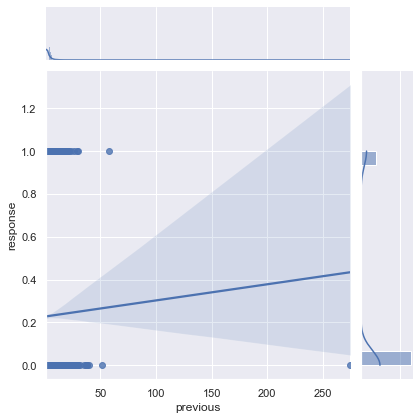

In [39]:
for col in num_cols[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df1[col],y = df1["response"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

In [30]:
#Label Encoding of Categorical Variables.


In [31]:
from sklearn.preprocessing import LabelEncoder

In [40]:
df3 = df1[cat_cols].apply(LabelEncoder().fit_transform)
df3.head()

,housing,targeted,loan,month,contact,job,marital,poutcome,education,default
24060,0,1,0,10,1,0,1,0,2,0
24062,1,1,1,10,1,0,2,1,1,0
24064,1,1,0,10,1,7,1,0,1,0
24072,1,1,0,10,1,4,1,1,2,0
24077,1,1,0,10,1,4,1,0,2,0


In [41]:
df4 = df3.join(df1[num_cols])
df4.head()

,housing,targeted,loan,month,contact,job,marital,poutcome,education,default,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,0,10,1,0,1,0,2,0,33,50000,882,21,39,1,151,3,0
24062,1,1,1,10,1,0,2,1,1,0,42,50000,-247,21,519,1,166,1,1
24064,1,1,0,10,1,7,1,0,1,0,33,70000,3444,21,144,1,91,4,1
24072,1,1,0,10,1,4,1,1,2,0,36,100000,2415,22,73,1,86,4,0
24077,1,1,0,10,1,4,1,0,2,0,36,100000,0,23,140,1,143,3,1


In [42]:
df4.corr()

,housing,targeted,loan,month,contact,job,marital,poutcome,education,default,age,salary,balance,day,duration,campaign,pdays,previous,response
housing,1.000000,0.086574,0.112240,0.017032,-0.072051,-0.132182,-0.056352,-0.287046,-0.127906,0.022611,-0.179517,-0.034703,-0.109598,-0.067401,-0.072505,0.062326,0.365964,0.007706,-0.320280
targeted,0.086574,1.000000,0.070190,0.011374,0.024672,-0.091083,-0.255486,-0.071648,-0.632761,0.019620,0.141069,-0.227927,-0.052601,-0.025070,-0.016042,0.017189,0.084503,-0.002387,-0.092791
loan,0.112240,0.070190,1.000000,-0.000715,-0.028964,-0.033795,-0.055374,-0.103648,-0.048812,0.052473,-0.009009,0.014393,-0.084921,0.008988,-0.032730,0.008033,0.022819,0.013683,-0.115212
month,0.017032,0.011374,-0.000715,1.000000,0.041944,-0.002806,-0.024663,-0.018198,-0.012213,0.020435,0.014876,0.018868,0.016244,-0.024655,-0.034737,0.024708,0.010131,0.012016,-0.009015
contact,-0.072051,0.024672,-0.028964,0.041944,1.000000,0.000723,-0.028908,0.024316,-0.050515,-0.019521,0.175935,-0.035471,0.038262,-0.012872,-0.023321,0.077261,0.012072,0.037374,-0.007714
job,-0.132182,-0.091083,-0.033795,-0.002806,0.000723,1.000000,0.072865,0.066452,0.159377,-0.021111,-0.020727,0.115646,0.041900,0.014952,0.023745,-0.009013,-0.116824,-0.000903,0.079660
marital,-0.056352,-0.255486,-0.055374,-0.024663,-0.028908,0.072865,1.000000,0.045484,0.122070,-0.005753,-0.415511,-0.043422,-0.020178,0.016389,-0.009392,-0.008772,-0.006392,0.005519,0.049751
poutcome,-0.287046,-0.071648,-0.103648,-0.018198,0.024316,0.066452,0.045484,1.000000,0.083959,-0.025767,0.052255,0.013536,0.051497,0.016912,0.110449,-0.001180,-0.243675,0.042900,0.425229
education,-0.127906,-0.632761,-0.048812,-0.012213,-0.050515,0.159377,0.122070,0.083959,1.000000,-0.013600,-0.120713,0.422500,0.074225,0.023110,-0.001378,-0.024108,-0.157076,0.000963,0.108581
default,0.022611,0.019620,0.052473,0.020435,-0.019521,-0.021111,-0.005753,-0.025767,-0.013600,1.000000,-0.027905,0.000392,-0.045128,-0.000964,-0.002728,-0.002308,0.038702,0.012505,-0.028256


#### Predictive model 1: Logistic regression

In [36]:
# - Make a predictive model using logistic regression
# - Use RFE to select top n features in an automated fashion (choose n as you see fit)
# - Using p values and VIF, get rid of the redundant features
# - Estimate the model performance using k fold cross validation
# - What is the precision, recall, accuracy of your model?
# - Which features are the most important from your model?

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)

In [44]:
X = df4.drop("response", axis=1)
X.head()

,housing,targeted,loan,month,contact,job,marital,poutcome,education,default,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,0,10,1,0,1,0,2,0,33,50000,882,21,39,1,151,3
24062,1,1,1,10,1,0,2,1,1,0,42,50000,-247,21,519,1,166,1
24064,1,1,0,10,1,7,1,0,1,0,33,70000,3444,21,144,1,91,4
24072,1,1,0,10,1,4,1,1,2,0,36,100000,2415,22,73,1,86,4
24077,1,1,0,10,1,4,1,0,2,0,36,100000,0,23,140,1,143,3


In [45]:
y= df4[['response']]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [47]:
lr = LogisticRegression()

In [51]:
lr.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
cv_score= cross_val_score(lr,X_train,y_train, cv=5)
np.mean(cv_score)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _

0.7783370562666023

In [52]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1290
           1       0.56      0.23      0.32       351

    accuracy                           0.80      1641
   macro avg       0.69      0.59      0.60      1641
weighted avg       0.76      0.80      0.76      1641



In [53]:
confusion_matrix(y_pred,y_test)

array([[1228,  272],
       [  62,   79]], dtype=int64)

In [54]:
f1_score(y_pred,y_test)

0.32113821138211385

#### Predictive model 2: Random Forest
 

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)

In [58]:
rfc.fit(X_train,y_train)

<ipython-input-58-0b00acaf8842>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [59]:
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed whe

0.8406460721119016

In [60]:
y_pred1 = rfc.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1290
           1       0.76      0.47      0.58       351

    accuracy                           0.85      1641
   macro avg       0.81      0.71      0.75      1641
weighted avg       0.85      0.85      0.84      1641



In [62]:
f1_score(y_test,y_pred1)

0.5799648506151144

In [63]:
confusion_matrix(y_test,y_pred1)

array([[1237,   53],
       [ 186,  165]], dtype=int64)

In [64]:
from sklearn.metrics import roc_auc_score

In [65]:
roc_auc_score(y_test,y_pred1)

0.7145000993838204